# Исследование популярности компьютерных игр

## Оглавление
1. [Постановка задачи](#step_1)
2. [Загрузка файлов данных и изучение общей информации](#step_2)
3. [Предобработка данных](#step_3)
4. [Анализ данных](#step_4)
5. [Составление портрета пользователя](#step_5)
6. [Проверка гипотез](#step_6)
7. [Общий вывод](#step_7)

## 1. Постановка задачи <a id="step_1"></a>

У нас имеются данные о компьютерных играх, уровне продаж в различных регионах и их рейтинге. Находясь в декабре 2016, нам необходимо разработать план работы нашего интернет-магазина на следующий 2017 год, выработать стратегию продаж, а также выработать принципы прогнозирования направления развития бизнеса. Для этого нам необходимо проанализировать фактическую информацию, попытаться спрогнозировать наиболее популярный продукт и найти закономерности в данных.

## 2. Загрузка файлов данных и изучение общей информации  <a id="step_2"></a>

In [1]:
import pandas as pd #импортируем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import scipy
pd.options.display.float_format ='{:,.3f}'.format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Изучим файл с данными:

In [2]:
data = pd.read_csv('...')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.000",Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,"1,985.000",Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.000",Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,"2,009.000",Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.000",Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
5,Tetris,GB,"1,989.000",Puzzle,23.200,2.260,4.220,0.580,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.000",Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,"2,006.000",Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.000",Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,"1,984.000",Shooter,26.930,0.630,0.280,0.470,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.000","16,715.000","16,715.000","16,715.000","16,715.000","8,137.000"
mean,"2,006.485",0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,"1,980.000",0.000,0.000,0.000,0.000,13.000
25%,"2,003.000",0.000,0.000,0.000,0.000,60.000
50%,"2,007.000",0.080,0.020,0.000,0.010,71.000
75%,"2,010.000",0.240,0.110,0.040,0.030,79.000
max,"2,016.000",41.360,28.960,10.220,10.570,98.000


Найдём кол.-во дублированных строк:

In [6]:
data.duplicated().sum()

0

Посмотрим, сколько уникальных названий компьютерных игр имеется в файле:

In [7]:
len(data['Name'].unique())

11560

Найдем уникальные игровые платформы:

In [8]:
data['Platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Посмотрим, игры каких жанров представлены в файле:

In [9]:
data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Найдем уникальные оценки пользователей:

In [10]:
data['User_Score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Посмотрим, сколько строк с оценкой "tbd":

In [11]:
len(data[data['User_Score'] == 'tbd'])

2424

Вероятно, для 2424-х записей значения пользовательского рейтинга еще не определены ("tbd" - to be defined).

Найдем уникальные возрастные рейтинги:

In [12]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### Вывод

В нашем распоряжении файл данных games.csv. В файле содержится 16715 записей о 11560 компьютерных играх, всего 11 столбцов. Данные организованы типами данных object, float64. Пропуски данных встречаются в 6 столбцах: 2 пропуска "Name" и "Genre", 269 "Year of release", 8578 "Critic Score", 6701 "User Score", 6766 "Rating". Дублированные строки отсутствуют. Всего в файле представлено 11560 компьютерных игр на 31-й различной платформе, 12 различных жанров. Пользовательские оценки "User Score" представлены только для 7590 записей, при этом часть записей имеют значение "tbd" ("to be defined"), а возрастной рейтинг "Rating" имеется только для 9949 строк.

## 3. Предобработка данных <a id="step_3"></a>

- Замена названий столбцов

Переименуем названия столбцов, используя нижний регистр:

In [13]:
data.columns = data.columns.str.lower()

In [14]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

- Преобразование данных

Преобразуем столбец "year_of_release" в тип datetime:

In [15]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')

Преобразуем "user_score" в тип float, предварительно заменив значения "tbd" на маркеры "-1", чтобы иметь возможность исключить такие значения в дальнейшем:

In [16]:
data.loc[data.loc[:,'user_score'] == 'tbd', 'user_score'] = np.nan

In [17]:
data['user_score'] = data['user_score'].astype('float64')

Проверим успешность преобразования:

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


- Обработка пропусков

Найдем строки с пропущенными "name":

In [19]:
data[data['name'].isnull() == True] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993-01-01,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,GEN,1993-01-01,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


Таких строк, в котором не заполнены "name", "genre" всего две. Не будем их удалять на данном этапе.

Также не будем удалять строки (всего 269) с прощенными годами на данном этапе, хотя таких строк немного и отсутствие данной информации существенно не повлияет на данные.

Извелечем из строк, где в названии игры упоминается год в четырехзначном виде и добавим его вместо пропущенных значений столбца "year_of_release". Убедимся также, что год принадлежит интервалу 1980...2016 на тот случай, если цифры относятся к маркетинговому названию, а не к интересующему нас году:

In [20]:
years_extracted = pd.to_datetime(
    data.loc[data['year_of_release'].isnull() == True, 'name'].str.extract(r'(\d{4})', expand = False).dropna(), format='%Y')

In [21]:
if ((years_extracted >= '1980') & (years_extracted <= '2016')).mean() == 1:
    display('Все значения принадлежат интервалу 1980...2016')
else:
    display('Одно или несколько значений не в интервале 1980...2016')

'Все значения принадлежат интервалу 1980...2016'

Такая замена нас устроит, поэтому добавляем добытые значения в таблицу data:

In [22]:
data.loc[years_extracted.index, 'year_of_release'] = years_extracted

Посмотрим, сколько значений удалось заменить:

In [23]:
len(years_extracted.index)

17

Итого было добавлено 17 строчек с годом выхода игры. Строго говоря, не для каждой игры такая замена корректна, т.к зачастую в названии указан не именно год выхода в продажи, а подчеркивается новизна версии. Впрочем, такая разница небольшая и может составлять 1 год. Для целей нашего анализа такое приближение допустимо, т.к. оно не сильно повлияет на результаты.

Изучим пропуски данных в "critic_score". Посмотрим за какие годы больше всего пропусков в данном столбце:

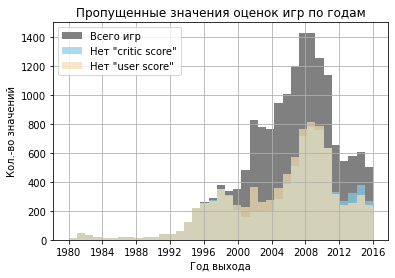

In [24]:
ax = data['year_of_release'].hist( bins=37, alpha=1, color='grey')
data[data['critic_score'].isna() == True]['year_of_release'].hist(ax=ax, bins=37, alpha=0.7, color='skyblue')
data[data['user_score'].isna() == True]['year_of_release'].hist(ax=ax, bins=37, alpha=0.7, color='wheat')
ax.legend(labels=['Всего игр', 'Нет "critic score"', 'Нет "user score"'])
ax.set_title('Пропущенные значения оценок игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Кол.-во значений')
plt.show()

Приведенная система оценок (0...100 для критиков и 0...10 для пользователей), а также то, что оценки критиков начали появляться только с началом 2000-х годов, говорит о том, что данная информация, вероятно, может быть взята с ресурса "Metacritic", который появился в 2001 году. Большой процент отсутсвующих значений оценок может быть связан с большим кол.-вом и игр и низкой популярностью многих из них.

Посмотрим, можно ли заполнить пропущенные рейтинги критиков и пользователей и насколько точной будет такая замена. Найдем 5 игр, которые были портированы на максимальное число платформ и построим диаграммы размаха оценок пользователей и критиков для таких игр:

In [25]:
top5_ported_games = data['name'].value_counts().head().index

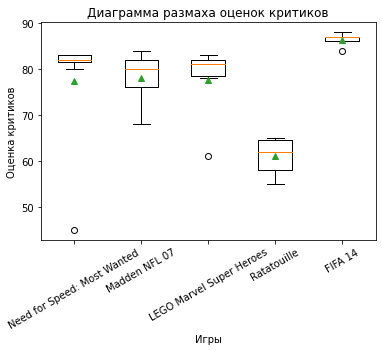

In [26]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) #скрываем предупреждения
plt.boxplot(
    [data[(data['name'] == top5_ported_games[0])&(data['critic_score']>=0)]['critic_score'],
     data[(data['name'] == top5_ported_games[1])&(data['critic_score']>=0)]['critic_score'],
     data[(data['name'] == top5_ported_games[2])&(data['critic_score']>=0)]['critic_score'],
     data[(data['name'] == top5_ported_games[3])&(data['critic_score']>=0)]['critic_score'],
     data[(data['name'] == top5_ported_games[4])&(data['critic_score']>=0)]['critic_score']],
     labels = top5_ported_games, showmeans=True)
plt.xticks(rotation=30)
plt.ylabel('Оценка критиков')
plt.xlabel('Игры')
plt.title('Диаграмма размаха оценок критиков')
plt.show()

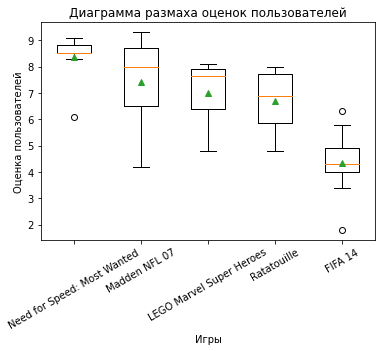

In [27]:
plt.boxplot(
    [data[(data['name'] == top5_ported_games[0])&(data['user_score']>=0)]['user_score'],
     data[(data['name'] == top5_ported_games[1])&(data['user_score']>=0)]['user_score'],
     data[(data['name'] == top5_ported_games[2])&(data['user_score']>=0)]['user_score'],
     data[(data['name'] == top5_ported_games[3])&(data['user_score']>=0)]['user_score'],
     data[(data['name'] == top5_ported_games[4])&(data['user_score']>=0)]['user_score']],
     labels = top5_ported_games, showmeans=True)  
plt.xticks(rotation=30)
plt.ylabel('Оценка пользователей')
plt.xlabel('Игры')
plt.title('Диаграмма размаха оценок пользователей')
plt.show()

Оценки критиков и пользователей для одних и тех же игр могут существенно разниться между платформами, поэтому при замене пропущенных значений таким методом возможно заметное влияние на статистику данных. Не будем заменять такие значения.

Посмотрим, какие платформы имеют наибольшее значение пропусков в возрастном рейтинге. Выведем долю пропусков по платформам:

In [28]:
data[data['critic_score'].isna() == True]['platform'].value_counts(normalize=True).head(10)

DS     0.167
PS     0.116
PS2    0.101
PSP    0.087
Wii    0.086
PS3    0.060
GBA    0.045
3DS    0.041
X360   0.040
N64    0.037
Name: platform, dtype: float64

Наибольшая доля пропусков в DS, PS, PS2, PSP, Wii, PS3 - их объединяет то, что эти платформы выпущены Японской фирмой и имеют большое распространение для своего времени Японии. Оцениваются же игры в этой стране по другой системе, отличной от ESRB.

Посмотрим на статистику отсутствующих значений рейтинга ESRB:

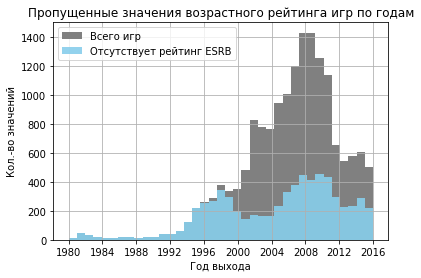

In [29]:
ax = data['year_of_release'].hist(bins=37, alpha=1, color='grey')
data[data['rating'].isna() == True]['year_of_release'].hist(ax=ax, bins=37, alpha=0.9, color='skyblue')
ax.legend(labels=['Всего игр', 'Отсутствует рейтинг ESRB'])
ax.set_title('Пропущенные значения возрастного рейтинга игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Кол.-во значений')
plt.show()

Основное кол.-во данных о возрастном рейтинге начинается с 1996 г (сама организация ESRB была основана в 1994). Большое число пропусков в позднее время может быть связано с тем, что рейтинг ESRB применяется на территории Северной Америки, многие же остальные страны имеют свои рейтинги. Возрастной рейтинг - это фактическая информация, которая зависит от каждой конкретной игры на своей платформе, поэтому не будем заменять такие пропущенные значения.

- Подсчет суммарных продаж во всех регионах

Добавим столбец "total_sales" с суммарными продажами:

In [30]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посмотрим, как изменялись суммарные продажи по всем платформам:

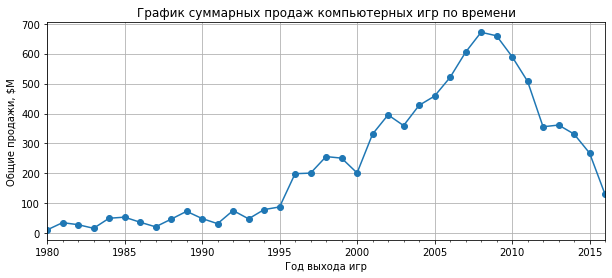

In [31]:
data.pivot_table(index='year_of_release', values='total_sales', aggfunc={'sum'}).plot(
    figsize=(10,4), grid=True, style='o-', legend=False)
plt.xlabel('Год выхода игр')
plt.ylabel('Общие продажи, $M')
plt.title('График суммарных продаж компьютерных игр по времени')
plt.show()

Продажи игр на рассматриваемых платформах почти стабильно росли до 2008 г. с кратковременными небольшими спадами. Начиная же с 2008 г. данные платформы начали терять популярность по причинам, которые могут быть обусловлены как общим состоянием мировой экономики, так и изменением структуры игровой индустрии.

### Вывод

На данном этапе была произведена замена "year_of_release" в тип datetime, "user_score" в тип float. Строковые значения "tbd" при этом были заменены на тип "np.nan", чтобы не использовать дополнительное условие для срезов данных в дальнейшем. Несмотря на большое кол.-во пропущенных значений в столбцах с рейтингом пользователей и критиков, такие значения не заполнялись, чтобы не исказить распределение данных; в дальнейшем такие пропущенные значения могут быть отсеяны при составлении среза данных. Пропущенные значения в столбце с возрастным рейтингом также не могут быть чем-либо заменены, поэтому оставлены без изменения. Также на данном этапе в таблицу была добавлена информация о суммарных продажах игр с течением времени.

## 4. Анализ данных <a id="step_4"></a>

- Посмотрим на то, сколько игр выпускалось в разные годы

Создадим таблицу с кол.-вом выпущенных игр в зависимости от времени и построим соответствующий график:

In [32]:
games_by_years = data['year_of_release'].value_counts().reset_index().sort_values(by='index').reset_index(drop=True)
games_by_years.set_axis(['release year', 'number of games'], axis='columns', inplace=True)

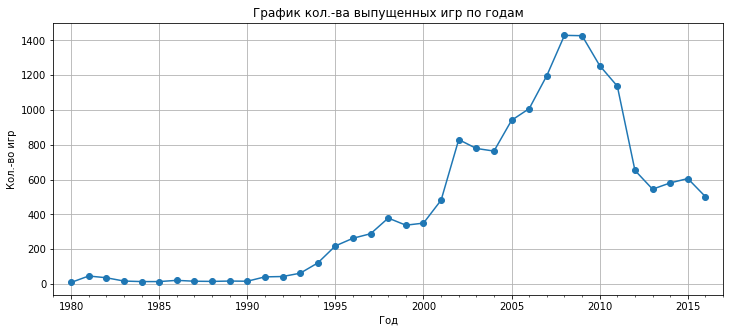

In [33]:
ax = games_by_years.plot('release year', 'number of games', style='o-', figsize=(12,5), grid=True, legend=False)
ax.set_title('График кол.-ва выпущенных игр по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Кол.-во игр')
plt.xlim('1979','2017')
plt.show()

График кол.-ва игр коррелирует с суммарными продажами.

Посмотрим на статистику распределения выпущенных игр за 2 периода: 1980...1993 и 1994...2016:

In [34]:
data.query('year_of_release < 1994')['year_of_release'].value_counts().describe()

count   14.000
mean    26.214
std     16.159
min      9.000
25%     15.250
50%     17.000
75%     39.750
max     62.000
Name: year_of_release, dtype: float64

In [35]:
data.query('year_of_release >= 1994')['year_of_release'].value_counts().describe()

count      23.000
mean      699.826
std       393.480
min       121.000
25%       364.500
50%       606.000
75%       974.500
max     1,429.000
Name: year_of_release, dtype: float64

В период 1980...1994 было создано относительно небольшое кол.-во компьютерных игр. Всплеск их создания начинается примерно в 1994 г. и растет почти линейно до 2008 г., после чего падает до минимума в 2013 г. и продолжает держаться на этом уровне до конца исследуемого периода. Среднее значение выпускаемых игр за период 1980...1993 всего 26 в год, в то время как за период 1994...2016 699 игр в год - разница на 2 порядка. Вероятно, рост в середине девяностных связан с активным развитием электроники и становлением игровой индустрии, а падение 2009 с общими экономическими проблемами во всем мире и изменениями на рынке видеоигр.

- Посмотрим как меняются продажи по платформам

Изучим распределение кол.-ва игр по всем платформам. Построим графики кол.-ва игр по всем платформам, чтобы посмотреть какие распределения присущи различным платформам:

In [36]:
data_platforms = data.pivot_table(index=['year_of_release', 'platform'], values='name', aggfunc={'count'}).reset_index()

In [37]:
data_platforms.head()

,year_of_release,platform,count
0,1980-01-01,2600,9
1,1981-01-01,2600,46
2,1982-01-01,2600,36
3,1983-01-01,2600,11
4,1983-01-01,NES,6


In [38]:
platforms_list = data['platform'].unique()

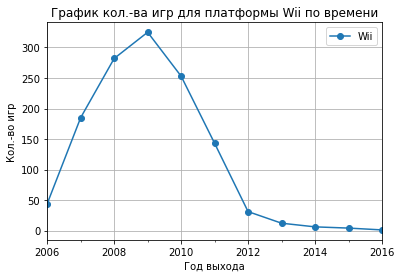

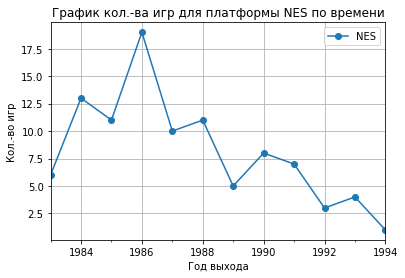

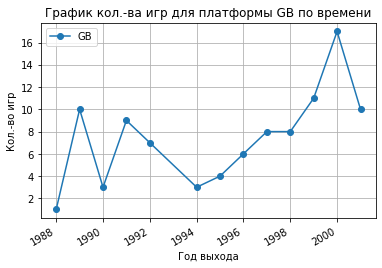

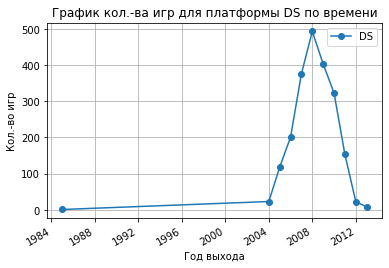

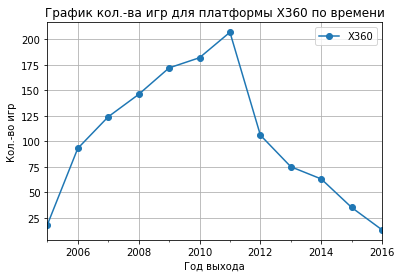

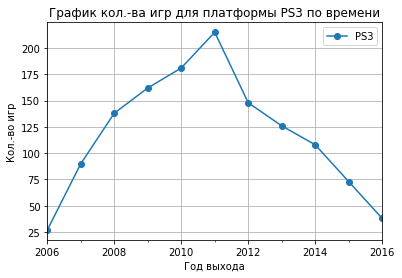

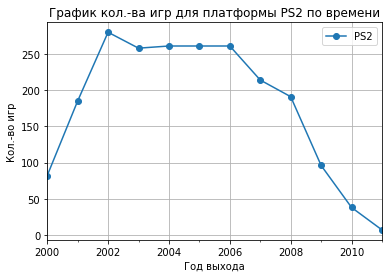

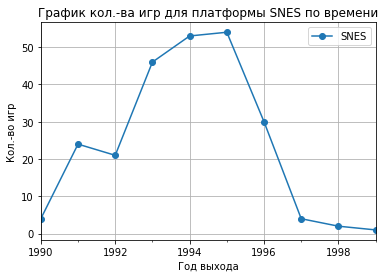

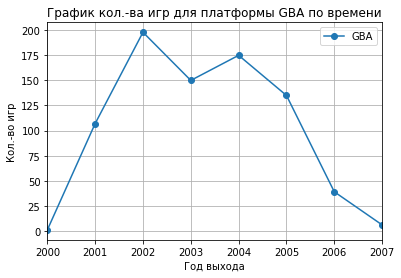

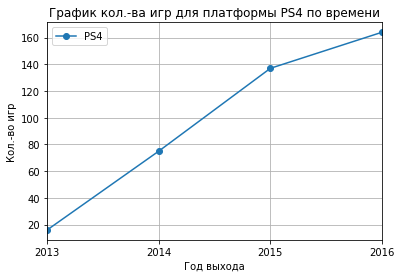

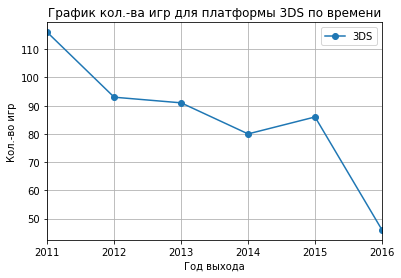

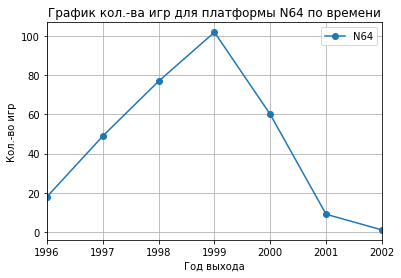

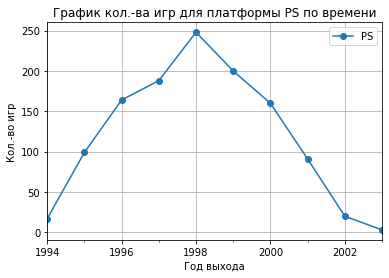

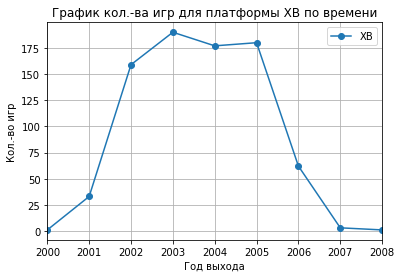

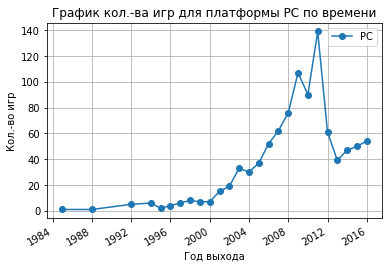

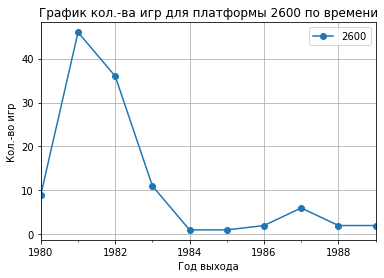

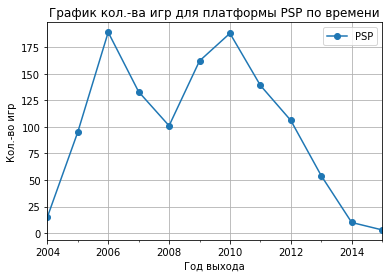

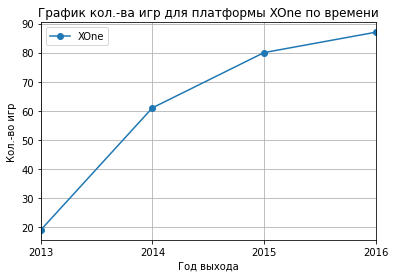

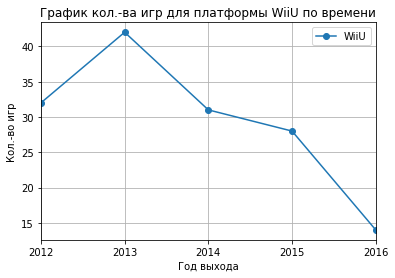

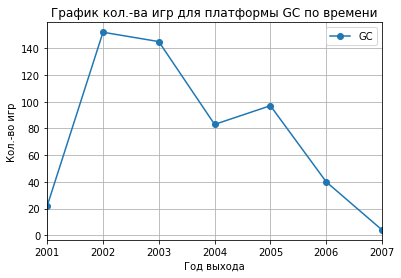

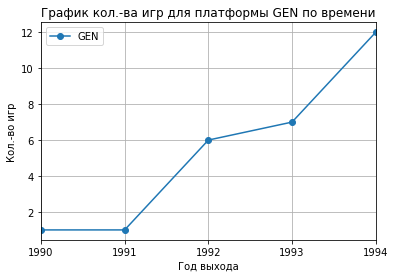

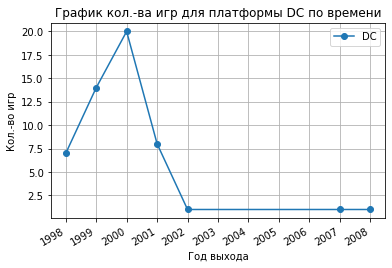

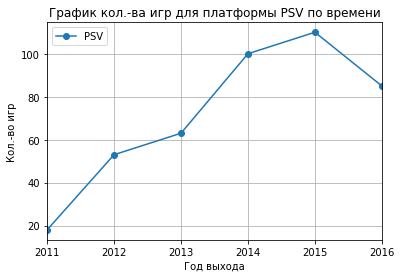

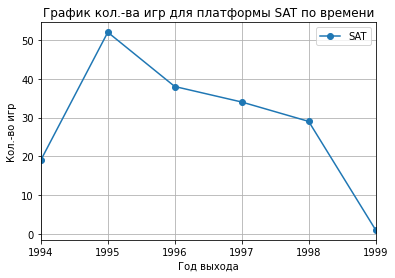

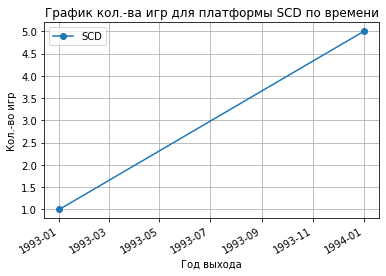

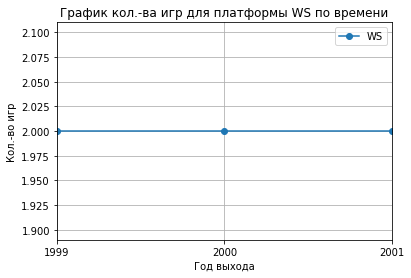

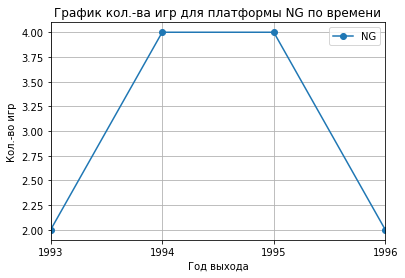

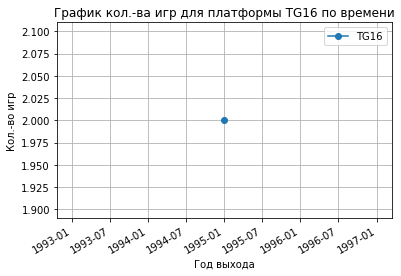

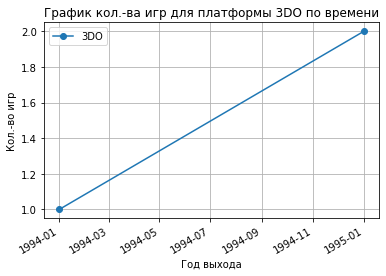

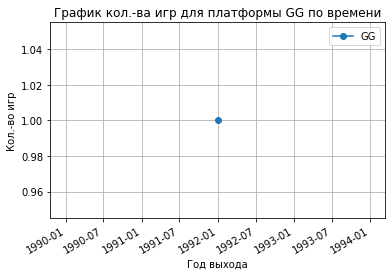

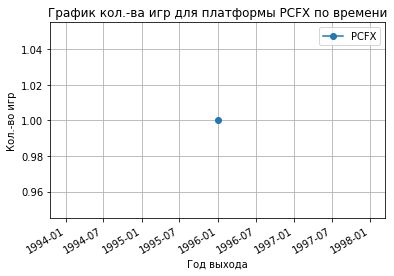

In [39]:
for i in range(0,31):
    data_platforms[data_platforms['platform'] == platforms_list[i]].plot(
        'year_of_release', 'count', label=platforms_list[i], grid=True, style='o-')
    plt.xlabel('Год выхода')
    plt.ylabel('Кол.-во игр')
    plt.title('График кол.-ва игр для платформы '+ platforms_list[i] + ' по времени')
    plt.show()

Большая часть платформ имеет характерный рост, иногда стабилизацию, а затем падение кол.-ва созданных игр. Единственные платформы, которые находятся на стадии роста числа игр на данный момент - PS4, Xbox One, PC.

Выберем платформы с наибольшими суммарными продажами и построим график распределения:

Найдем платформы с максимальными суммарными продажами:

In [40]:
best_sellers = data.pivot_table(
    index=['platform'], values='total_sales', aggfunc={'sum'}
    ).reset_index().sort_values(by='sum', ascending=False).reset_index(drop=True)
best_sellers.head(10)

,platform,sum
0,PS2,"1,255.770"
1,X360,971.420
2,PS3,939.650
3,Wii,907.510
4,DS,806.120
5,PS,730.860
6,GBA,317.850
7,PS4,314.140
8,PSP,294.050
9,PC,259.520


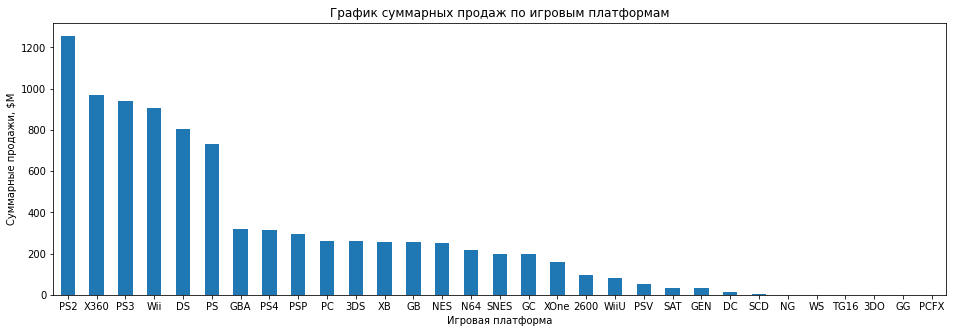

In [41]:
best_sellers.plot('platform', 'sum', kind='bar', figsize=(16,5), rot=0, legend=False)
plt.xlabel('Игровая платформа')
plt.ylabel('Суммарные продажи, $M')
plt.title('График суммарных продаж по игровым платформам')
plt.show()

На текущий 2016 г. самые популярные по продажам за всю историю видеоигр это платформы PS2, XBox360, PS3, Wii, DS, PS.

Построим распределение продаж по годам для различным платформ:

In [42]:
best_sellers_years = data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc={'sum'}).reset_index()
best_sellers_years.head()

,platform,year_of_release,sum
0,2600,1980-01-01,11.380
1,2600,1981-01-01,35.680
2,2600,1982-01-01,28.880
3,2600,1983-01-01,5.840
4,2600,1984-01-01,0.270


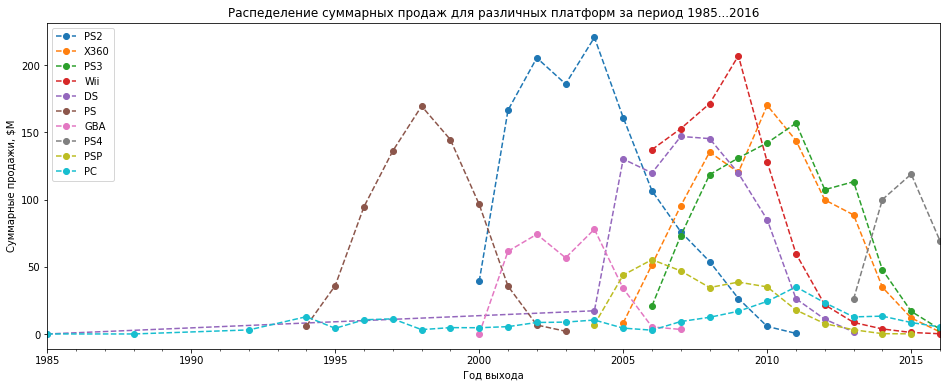

In [43]:
ax = best_sellers_years[best_sellers_years['platform'] == best_sellers['platform'][0]].plot(
    'year_of_release', 'sum', label=best_sellers['platform'][0], figsize=(16,6), style='o--')
i = 0
for i in range(1,10):
    best_sellers_years[best_sellers_years['platform'] == best_sellers['platform'][i]].plot(
        'year_of_release', 'sum', ax=ax, label=best_sellers['platform'][i], style='o--')

plt.xlabel('Год выхода')
plt.ylabel('Суммарные продажи, $M')
plt.title('Распеделение суммарных продаж для различных платформ за период 1985...2016')
plt.show()

Характерное "время жизни" в продажах многих игровых платформ 7...10 лет. Из рейтинга топ-10 по суммарным продажам выбивается "PC" т.к. это не классическая игровая платформа, а игры являются лишь одним из приложений персональных компьютеров. 

- Выбор актуального периода для анализа данных

Исходя из времени жизненного цикла  игровых платформ, актуальный интервал, который рассмотрим более детально - последние 7 лет. На данном интервале будет видно, какие платформы в данный момент являются популярными, а какие скоро выйдут из продаж.
Создадим таблицу с актуальными платформами, начиная с 2010 г., и построим график суммарных продаж по этим платформам:

In [44]:
actual_platforms = best_sellers_years[(best_sellers_years['year_of_release'] >= '2010')].reset_index(drop=True)
actual_platforms.head()

,platform,year_of_release,sum
0,3DS,2011-01-01,63.200
1,3DS,2012-01-01,51.360
2,3DS,2013-01-01,56.570
3,3DS,2014-01-01,43.760
4,3DS,2015-01-01,27.780


In [45]:
actual_platforms_name = actual_platforms['platform'].unique()

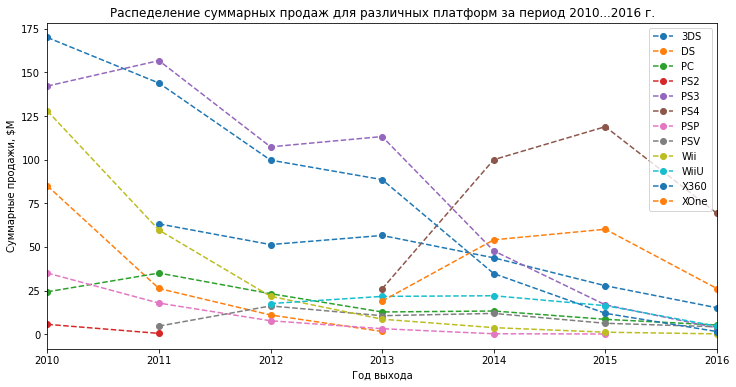

In [46]:
ax = actual_platforms[actual_platforms['platform'] == actual_platforms_name[0]].plot(
    'year_of_release', 'sum', label='3DS', figsize=(12,6), style='o--')

for i in range(1, len(actual_platforms_name)):
    actual_platforms[actual_platforms['platform'] == actual_platforms_name[i]].plot(
        'year_of_release', 'sum', ax=ax, label=actual_platforms_name[i], style='o--')

plt.xlabel('Год выхода')
plt.ylabel('Суммарные продажи, $M')
plt.title('Распеделение суммарных продаж для различных платформ за период 2010...2016 г.')
plt.show()

Исходя из графика видно, что платформы, которые занимают и, вероятно, будут занимать большую долю продаж это PS4, XOne, 3DS. Многие прежде популярные платформы показывают значительно падение в интервале 2010...2015 (PS3, X360, Wii и др.), 
Изменения на рынке игр происходят довольно динамично и наиболее актуальные данные могли бы быть взяты за 2015-2016, но т.к. данные за текущий год неполные, наиболее актуальным будем считать наиболее близкий по времени к нам период 2014-2016 г.

Запишем данные за последние неполные 3 года в таблицу "actual_data":

In [47]:
actual_data = data[(data['year_of_release'] >= '2014')].reset_index(drop=True)
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.030,5.860,0.360,2.380,NaN,NaN,NaN,14.630
1,Grand Theft Auto V,PS4,2014-01-01,Action,3.960,6.310,0.380,1.970,97.000,8.300,M,12.620
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.350,3.490,3.100,0.740,NaN,NaN,NaN,11.680
3,FIFA 16,PS4,2015-01-01,Sports,1.120,6.120,0.060,1.280,82.000,4.300,E,8.580
4,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.990,3.490,0.220,1.280,NaN,NaN,NaN,7.980


- Выбор потенциально прибильных платформ

Найдем суммарные продажи платформ за актуальный период:

In [48]:
actual_data.pivot_table(
    index='platform', values='total_sales', aggfunc={'sum'}).sort_values(by='sum', ascending=False).reset_index()

,platform,sum
0,PS4,288.150
1,XOne,140.360
2,3DS,86.680
3,PS3,68.180
4,X360,48.220
5,WiiU,42.980
6,PC,27.050
7,PSV,22.400
8,Wii,5.070
9,PSP,0.360


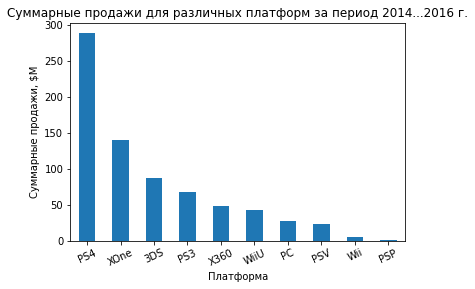

In [49]:
actual_data.pivot_table(
    index='platform', values='total_sales', aggfunc={'sum'}).sort_values(by='sum', ascending=False).reset_index().plot(
'platform', 'sum', kind='bar', rot=25, legend=False)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, $M')
plt.title('Суммарные продажи для различных платформ за период 2014...2016 г.')
plt.show()

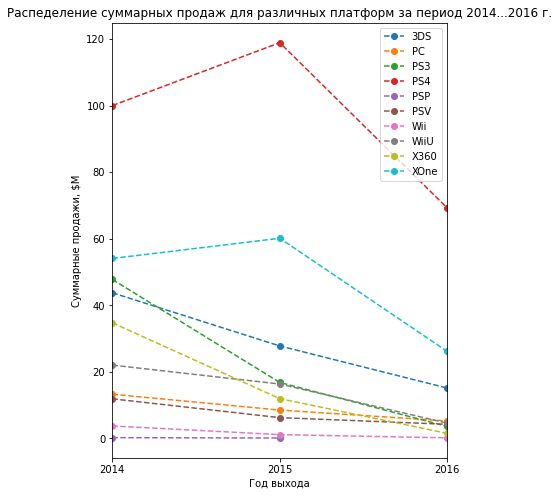

In [50]:
actual_platforms = best_sellers_years[(best_sellers_years['year_of_release'] >= '2014')].reset_index(drop=True)
actual_platforms_name = actual_platforms['platform'].unique()
ax = actual_platforms[actual_platforms['platform'] == actual_platforms_name[0]].plot(
    'year_of_release', 'sum', label='3DS',  style='o--', figsize=(6,8))
i = 0
for i in range(1, len(actual_platforms_name)):
    actual_platforms[actual_platforms['platform'] == actual_platforms_name[i]].plot(
        'year_of_release', 'sum', ax=ax, label=actual_platforms_name[i], style='o--')

plt.xlabel('Год выхода')
plt.ylabel('Суммарные продажи, $M')
plt.title('Распеделение суммарных продаж для различных платформ за период 2014...2016 г.')
plt.show()

PS4, XOne самые прибыльные платформы и единственные, исходя из трендов, прибыль которых может вырасти по результатам 2016 г. и в 2017 г. 3DS, PS3, X360 по-прежнему занимают большую долю рынка, но их продажи стремительно падают.
WiiU, PC, PSV имеют относительно низкие, но стабильные продажи.

- Построение "ящика с усами" для различных платформ

Построим диаграммы размаха для 8 наиболее продаваемых платформ:

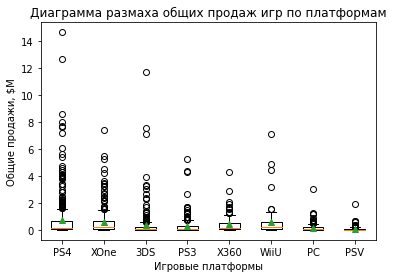

In [51]:
plt.boxplot([actual_data[actual_data['platform']=='PS4']['total_sales'],
           actual_data[actual_data['platform']=='XOne']['total_sales'],
           actual_data[actual_data['platform']=='3DS']['total_sales'],
           actual_data[actual_data['platform']=='PS3']['total_sales'],
           actual_data[actual_data['platform']=='X360']['total_sales'], 
           actual_data[actual_data['platform']=='WiiU']['total_sales'],
           actual_data[actual_data['platform']=='PC']['total_sales'],
           actual_data[actual_data['platform']=='PSV']['total_sales']        
            ], labels=['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV'], showmeans=True)
plt.xlabel('Игровые платформы')
plt.ylabel('Общие продажи, $M')
plt.title('Диаграмма размаха общих продаж игр по платформам')
plt.show()

Ограничим значение продаж сверху для лучшего представления данных:

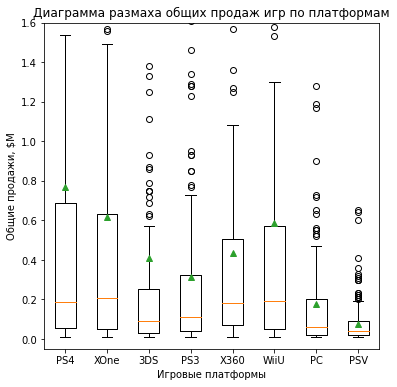

In [52]:
plt.subplots(figsize=(6, 6))
plt.boxplot([actual_data[actual_data['platform']=='PS4']['total_sales'],
           actual_data[actual_data['platform']=='XOne']['total_sales'],
           actual_data[actual_data['platform']=='3DS']['total_sales'],
           actual_data[actual_data['platform']=='PS3']['total_sales'],
           actual_data[actual_data['platform']=='X360']['total_sales'], 
           actual_data[actual_data['platform']=='WiiU']['total_sales'],
           actual_data[actual_data['platform']=='PC']['total_sales'],
           actual_data[actual_data['platform']=='PSV']['total_sales']        
            ], labels=['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV'], showmeans=True)
plt.ylim(-0.05, 1.6)
plt.xlabel('Игровые платформы')
plt.ylabel('Общие продажи, $M')
plt.title('Диаграмма размаха общих продаж игр по платформам')
plt.show()

Найдем распределение кол.-ва игр по различным платформам:

In [53]:
actual_data.pivot_table(index='platform', values='name', aggfunc={'count'}).sort_values(by='count', ascending=False)

,count
platform,
PS4,376
PSV,295
XOne,228
PS3,219
3DS,212
PC,151
X360,111
WiiU,73
PSP,13


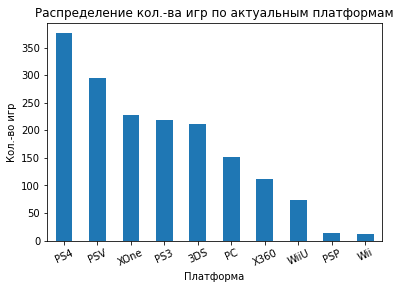

In [54]:
actual_data.pivot_table(index='platform', values='name', aggfunc={'count'}).sort_values(by='count', ascending=False).plot(
kind='bar', rot=25, legend=False)
plt.xlabel('Платформа')
plt.ylabel('Кол.-во игр')
plt.title('Распределение кол.-ва игр по актуальным платформам')
plt.show()

Вероятно, высокие продажи PS4, XOne, PS3, 3DS побуждают производителей выпускать для них соответствующее высокое кол.-во игр. PSV же хоть и накопила в своем портфолио большое кол.-во игр, уже не продается хорошо.

Найдем минимальные и максимальные значения среднего, медианы продаж игр по платформам:

In [55]:
actual_platforms_name = actual_data.pivot_table(
    index='platform', values='total_sales', aggfunc={'sum'}).sort_values(
    by='sum', ascending=False).reset_index()['platform'].head(8)

In [56]:
medians = []
for platform in actual_platforms_name:
    medians.append(actual_data[actual_data['platform']==platform]['total_sales'].median())
max(medians)   

0.205

In [57]:
medians = []
for platform in actual_platforms_name:
    medians.append(actual_data[actual_data['platform']==platform]['total_sales'].median())
min(medians) 

0.04

In [58]:
means = []
for platform in actual_platforms_name:
    means.append(actual_data[actual_data['platform']==platform]['total_sales'].mean())
max(means)  

0.7663563829787233

In [59]:
means = []
for platform in actual_platforms_name:
    means.append(actual_data[actual_data['platform']==platform]['total_sales'].mean())
min(means) 

0.07593220338983052

Таким образом, нижняя граница "усов" лежит в районе 0. У всех рассматриваемых платформ имеется много выбросов сверху, которые сильно влияют на среднее значение продаж, завышая его. Тем не менее, значения выбросов довольно редкие, т.к. медиана лежит ближе к нижней части "ящика". Разница в продажах внутри каждой платформы лежит в широких пределах - к примеру, разница между средним и типичными значениями выбросов для PS4 достигает двух порядков. Значения медиан продаж изменяются в диапазоне 40...200 kusd за игру на платформе,  средние значения в диапазоне 27...766 kusd. Среднее значение продаж игр выше у платформ PS4, XOne, WiiU. Самые низкое значение средних продаж - PC, PSV, PS3.

- Влияние отзывов на продажи внутри одной платформы 

Рассмотрим самую популярную по кол.-ву игр и продаж платформу PS4, построим диаграммы рассеяния:

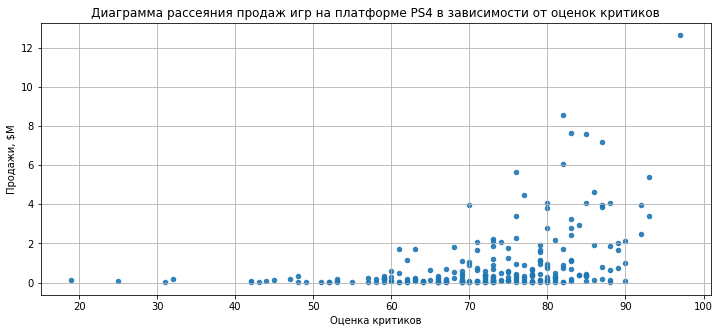

In [60]:
actual_data[actual_data['platform'] == 'PS4'].plot(
    'critic_score', 'total_sales', kind='scatter', alpha=0.9, figsize=(12,5), grid=True)
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, $M')
plt.title('Диаграмма рассеяния продаж игр на платформе PS4 в зависимости от оценок критиков')
plt.show()

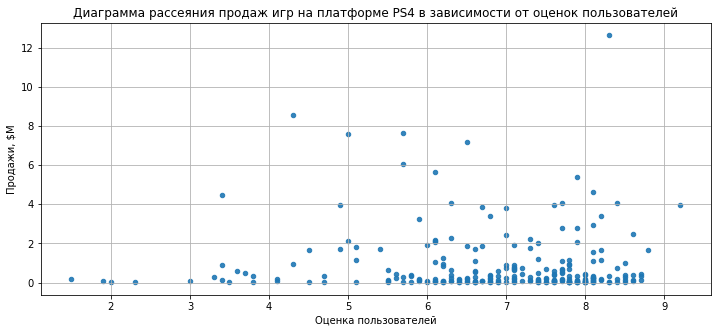

In [61]:
actual_data[actual_data['platform'] == 'PS4'].plot(
    'user_score', 'total_sales', kind='scatter', alpha=0.9, figsize=(12,5), grid=True)
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, $M')
plt.title('Диаграмма рассеяния продаж игр на платформе PS4 в зависимости от оценок пользователей')
plt.show()

Найдем коэффициенты корреляции для оценок критиков и пользователей:

In [62]:
actual_data[actual_data['platform'] == 'PS4']['total_sales'].corr(
actual_data[actual_data['platform'] == 'PS4']['critic_score'])

0.40266141068104083

In [63]:
actual_data[(actual_data['platform'] == 'PS4')]['total_sales'].corr(
actual_data[(actual_data['platform'] == 'PS4')]['user_score'])

-0.040131589472697356

Между оценками критиков и продажами существует слабая прямая связь (коэф. корреляции 0.4). Между оценками пользователей и продажами связь отсутствует. В обоих случаях при увеличении оценок происходит расширение диапазона выручки, которую могут иметь компьютерные игры. Т.о., мнение критиков гораздо лучше может спрогнозировать высокие продажи, чем рейтинг от пользователей, но даже в этом случае критики часто не могут дать гарантию коммерческого успеха игр.

Создадим таблицу "sales_corr", которая будет содержать коэффициенты корреляции между оценкой критиков, оценкой пользователей и продажами для актуальных платформ:

In [64]:
sales_corr = pd.DataFrame(columns=['platforms', 'critic_corr', 'users_corr'])
sales_corr['platforms'] = ['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'PSV']

In [65]:
i = 0
for platform in sales_corr['platforms']:
    sales_corr['critic_corr'][i] = actual_data[actual_data['platform'] == platform]['critic_score'].corr(
    actual_data[actual_data['platform'] == platform]['total_sales'])
    sales_corr['users_corr'][i] = actual_data[(
    actual_data['platform'] == platform)]['total_sales'].corr(
    actual_data[(actual_data['platform'] == platform)]['user_score'])
    i += 1

In [66]:
sales_corr

,platforms,critic_corr,users_corr
0,PS4,0.403,-0.040
1,3DS,0.314,0.215
2,XOne,0.429,-0.070
3,WiiU,0.370,0.408
4,PS3,0.447,-0.167
5,X360,0.526,-0.138
6,PC,0.175,-0.072
7,PSV,0.043,-0.168


Оценка критиков для большинства платформ имеет слабую корреляцию. Оценка же пользователей почти всегда не имеет корреляции.

- Распределение игр по жанрам

Построим таблицу и график распределения суммарных продаж по различным жанрам:

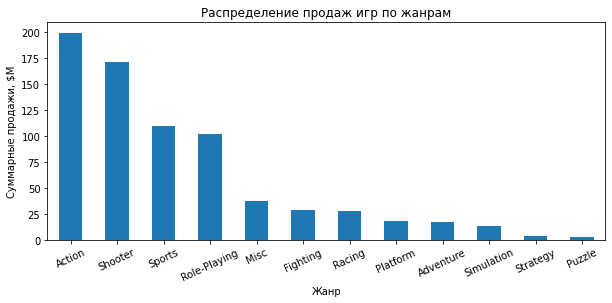

In [67]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc={'sum'}).sort_values(by='sum', ascending=False).plot(
kind='bar', rot=25, figsize=(10,4), legend=False)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, $M')
plt.title('Распределение продаж игр по жанрам')
plt.show()

Наиболее продаваемые игры принадлежат самым активным и "жестоким" жанрам - action, shooter, RPG. Самые же непродаваемые это спокойные и вдумчивые игры - strategy, puzzles, simulators.

### Вывод

На данном этапе была проанализирована информация по компьютерным играм. Кол.-во выпущенных игр по рассматриваемым платформам начало активно расти, начиная с 1994 г. и вплоть до 2008, после чего перешло к довольно резкому падению и стабилизации в 2013-2014 г. Поведение кривых изменения кол.-ва игр для популярных платформ имеют схожие черты - это плавный подъем, стабилизация на максимальном уровне, затем падение до минимума. Такой жизненный цикл продаж каждой новой платформы обычно занимает от 7 до 10 лет. Максимальные суммарные продажи показывают такие платформы, жизненный цикл которых подходит к концу, и, соответственно, мы имеем максимальное кол.-во информации о продажах по ним - это платформы PS2, X360, PS3, Wii, DS, PS. Платформы, которые показывают рост кол.-ва игр это PS4, Xbox One (вышли в продажу в 2013 г.), а также PC. 

Для дальнейшего анализа данных был выбран актуальный интервал времени 2014...2016 г., т.к. на рубеже 2013-2014 г. много прежде популярных платформ уходят с рынка, а их место занимают новые. Наиболее продаваемые платформы за актуальный период - PS4, XOne, а также теряющий популярность 3DS. Менее прибыльными являются PS3, X360, WiiU, и, вероятнее всего, их продажи будут падать еще больше. Продажи игр для персональных компьютеров хоть и занимают относительно небольшой процент рынка, но являются стабильными. Успехи PS4, XOne, 3DS подтверждаются также и диаграммами размаха - много игр со сверхвысокими продажами смещают распределение в большую сторону, как и у остальных успешных в прошлом платформ. 

Далее было рассмотрено влияние оценок критиков. Хоть и слабая, но значимая зависимость продаж и оценок критиков для большинства платформ прослеживается, вероятно, из-за более профессионального подхода самих оценщиков. Связь же продаж и оценок пользователей практически отсутствует.

Наиболее популярные жанры - активные Action, Shooter, Sports, RPG. Вероятно, большинство пользователей привлекает получение большого кол.-ва адреналина, в отличие от самых мало продаваемых симуляторов, стратигий и пазлов. 

## 5. Портрет пользователя <a id="step_5"></a>

Составим портрет типичного игрока для каждого региона по платформам и жанрам, а также учтем возрастной рейтинг. Для этого создадим сводные таблицы, которые будем использовать в дальнейших расчетах и построим графики.

Для начала посмотрим в целом на структуру рынка по регионам, построим диаграмму:

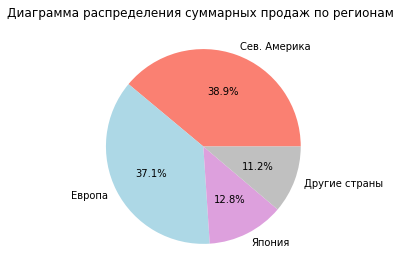

In [114]:
labels = ['Сев. Америка', 'Европа', 'Япония', 'Другие страны']
sizes = [
     actual_data['na_sales'].sum(),
     actual_data['eu_sales'].sum(),
     actual_data['jp_sales'].sum(),
     actual_data['other_sales'].sum()]

fig1, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['salmon', 'lightblue', 'plum', 'silver'])
ax.axis('equal')
ax.set_title("Диаграмма распределения суммарных продаж по регионам \n")
plt.show()

Самые важные с точки зрения продаж это рынки Америки и Европы. Объем рынка Японии больше всех остальных стран в сумме.

Создадим сводную таблицу по продажам для всех платформ:

In [69]:
sales_by_region = actual_data.pivot_table(
    index='platform', values=['na_sales','eu_sales', 'jp_sales', 'other_sales'], aggfunc={'sum'})

In [70]:
sales_by_region.columns=['eu_sales','jp_sales', 'na_sales', 'other_sales']

In [71]:
sales_by_region

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
3DS,16.120,44.240,22.640,3.680
PC,17.970,0.000,7.230,1.850
PS3,25.540,11.220,22.050,9.370
PS4,130.040,15.020,98.610,44.480
PSP,0.000,0.360,0.000,0.000
PSV,3.530,14.540,2.520,1.810
Wii,2.590,0.000,2.080,0.400
WiiU,13.150,7.310,19.360,3.160
X360,15.490,0.080,28.300,4.350


Продажи для PSP очень маленькие, поэтому не будем их учитывать в дальнеших расчетах:

In [72]:
sales_by_region = sales_by_region[sales_by_region.index != 'PSP']

Построим график продаж для различных платформ по регионам, предварительно отсортировав их по убыванию для Северной Америки:

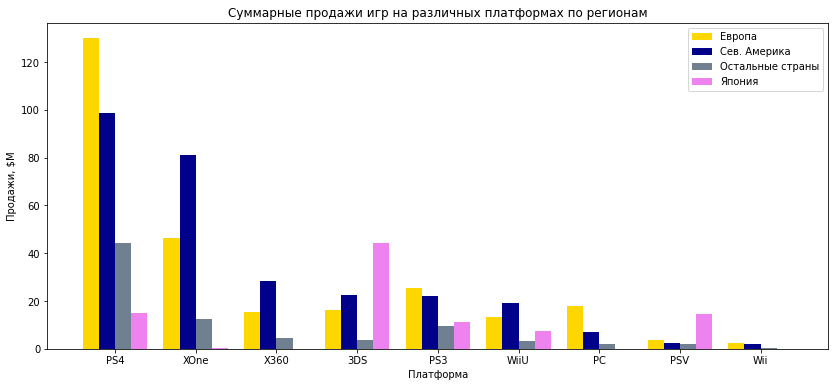

In [73]:
sales_by_region = sales_by_region.sort_values(by='na_sales', ascending=False)
labels = sales_by_region.index
x = np.arange(len(labels))  #местоположение столбцов
width = 0.2  #ширина столбцов
fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - 1.5*width, sales_by_region['eu_sales'], width, label='Европа', color='gold')
rects2 = ax.bar(x - 0.5*width, sales_by_region['na_sales'], width, label='Сев. Америка', color='darkblue')
rects3 = ax.bar(x + 0.5*width, sales_by_region['other_sales'], width, label='Остальные страны', color='slategrey')
rects4 = ax.bar(x + 1.5 *width, sales_by_region['jp_sales'], width, label='Япония', color='violet')              
ax.set_ylabel('Продажи, $M')
ax.set_xlabel('Платформа')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Суммарные продажи игр на различных платформах по регионам')
ax.legend()
plt.show()

В Северной Америке лучше, чем в других регионах продаются в  XOne, X360, WiiU, в Европе - PS4, PS3, PC, а в Японии 3DS и PSV. Наиболее схожие по распределению продаж по платформам рынки Сев.Америки, Европы вместе с остальным миром. Выбивается только поведение пользователей Японии.

Создадим сводную таблицу по наиболее продаваемым жанрам:

In [74]:
sales_by_genres = actual_data.pivot_table(
    index='genre', values=['na_sales','eu_sales', 'jp_sales', 'other_sales'], aggfunc={'sum'})

In [75]:
sales_by_genres.columns=['eu_sales','jp_sales', 'na_sales', 'other_sales']

In [76]:
sales_by_genres

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,74.680,29.580,72.530,22.570
Adventure,6.490,3.600,5.640,1.820
Fighting,6.690,6.370,12.430,2.730
Misc,12.860,5.610,15.050,4.030
Platform,6.800,2.690,6.790,1.810
Puzzle,0.520,0.930,0.650,0.110
Racing,14.130,1.760,8.740,2.890
Role-Playing,28.170,31.160,33.470,8.640
Shooter,65.520,4.870,79.020,21.530


Построим график продаж для различных жанров по регионам, предварительно отсортировав их по убыванию для Северной Америки:

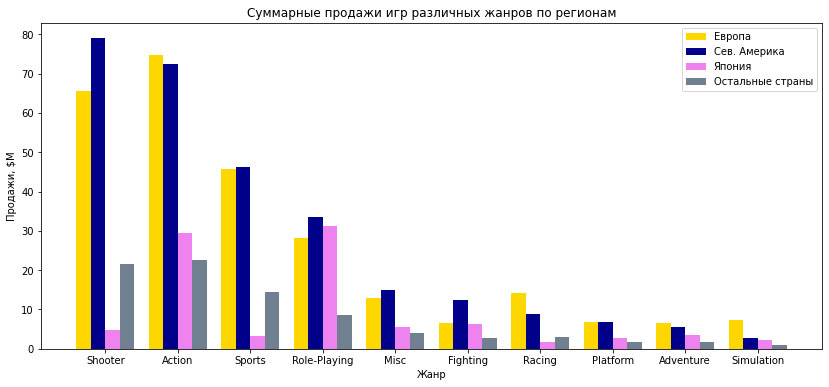

In [77]:
sales_by_genres_top10 = sales_by_genres.sort_values(by='na_sales', ascending=False).head(10)
labels = sales_by_genres_top10.index
x = np.arange(len(labels))  #местоположение столбцов
width = 0.2  #ширина столбцов
fig, ax = plt.subplots(figsize=(14,6))
rects1 = ax.bar(x - 1.5*width, sales_by_genres_top10['eu_sales'], width, label='Европа', color='gold' )
rects2 = ax.bar(x - 0.5*width, sales_by_genres_top10['na_sales'], width, label='Сев. Америка', color='darkblue')
rects3 = ax.bar(x + 0.5 *width, sales_by_genres_top10['jp_sales'], width, label='Япония', color='violet')
rects4 = ax.bar(x + 1.5*width, sales_by_genres_top10['other_sales'], width, label='Остальные страны', color='slategrey')
ax.set_ylabel('Продажи, $M')
ax.set_xlabel('Жанр')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Суммарные продажи игр различных жанров по регионам')
ax.legend()
plt.show()

В Сев.Америке лучше, чем в других регионах продаются Shooter, Sports, RPG, в Европе Action, в Японии же нет лидирующего над другими регионами жанра. Пользователи Северной Америки, Европы и остального мира чаще разделяют общие интересы в жанрах. Немного по-другому ведут себя только Японцы.

Создадим таблицу с продажами и возрастными рейтингами для каждого региона:

In [78]:
sales_by_rating = actual_data.pivot_table(
    index='rating', values=['na_sales','eu_sales', 'jp_sales', 'other_sales'], aggfunc={'sum'})

In [79]:
sales_by_rating.columns=['eu_sales','jp_sales', 'na_sales', 'other_sales']

In [80]:
sales_by_rating

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
E,58.060,8.940,50.740,15.390
E10+,26.160,4.460,33.230,7.830
M,93.440,8.010,96.420,28.670
T,34.070,14.780,38.950,11.330


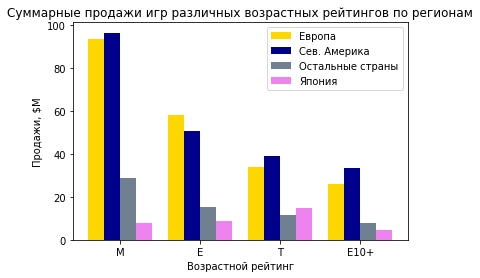

In [81]:
sales_by_rating = sales_by_rating.sort_values(by='na_sales', ascending=False)
labels = sales_by_rating.index
x = np.arange(len(labels))  #местоположение столбцов
width = 0.2  #ширина столбцов
fig, ax = plt.subplots(figsize=(6,4))
rects1 = ax.bar(x - 1.5*width, sales_by_rating['eu_sales'], width, label='Европа', color='gold' )
rects2 = ax.bar(x - 0.5*width, sales_by_rating['na_sales'], width, label='Сев. Америка', color='darkblue')
rects3 = ax.bar(x + 0.5*width, sales_by_rating['other_sales'], width, label='Остальные страны', color='slategrey')
rects4 = ax.bar(x + 1.5 *width, sales_by_rating['jp_sales'], width, label='Япония', color='violet')
ax.set_ylabel('Продажи, $M')
ax.set_xlabel('Возрастной рейтинг')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Суммарные продажи игр различных возрастных рейтингов по регионам')
ax.legend()
plt.show()

В Северной Америке больше, чем в других регионах, продаются игры с рейтингом "M", "T", "E10+", в Европе с рейтингом "E", в Японии же нет лидирующего над другими регионами жанра. Распределение по возрастному рейтингу также схожее для пользователей Северной Америки, Европы и остального мира. Япония выделяется наибольшими продажами игр с подростковой категорией.

Т.о., в Северной Америке и Европе в абсолютных цифрах продаж лидируют PS4, XOne и жанры
Action, Shooter, Sports, RPG. Высокие продажи характерны для одних и тех же платформ в Северной Америке, Европе и остальном мире, в отличие Японского рынка, где продажи отличаются в сторону доминирования 3DS и жанров RPG, Action и Fighing. В большей части регионов мира самые популярные игры со взрослым рейтингом "M" (17+) в отличие от Японии, где доминируют подростковые "T" (13+).

Далее рассмотрим каждый из регионов (Сев.Америка, Япония, Европа) более подробно.

- Поведение пользователей в Северной Америке

Построим диаграммы продаж компьютерных игр в зависимости от платформы, жанра и рейтинга:

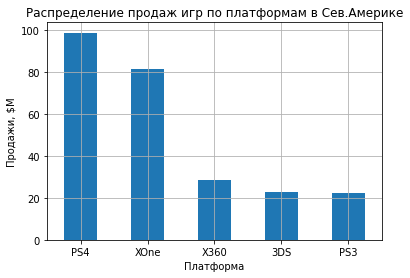

In [82]:
sales_by_region.sort_values(by='na_sales', ascending=False)['na_sales'].head().plot(kind='bar', rot=0, grid=True, figsize=(6,4))
plt.xlabel('Платформа')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по платформам в Сев.Америке')
plt.show()

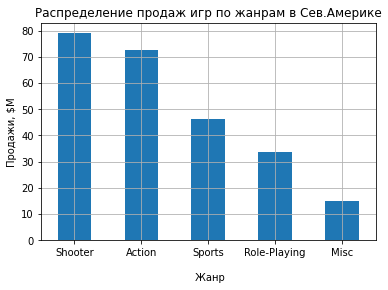

In [83]:
sales_by_genres.sort_values(by='na_sales', ascending=False)['na_sales'].head().plot(kind='bar', rot=0, grid=True,figsize=(6,4))
plt.xlabel('\n Жанр')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по жанрам в Сев.Америке')
plt.show()

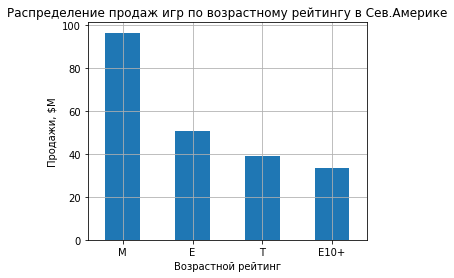

In [84]:
sales_by_rating.sort_values(by='na_sales', ascending=False)['na_sales'].plot(kind='bar', rot=0, grid=True, figsize=(5,4))
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по возрастному рейтингу в Сев.Америке')
plt.show()

Самая популярная платформа в Сев.Америке с большим отрывом PS4 - её продажи почти равны суммарным продажам оставшихся 4-х популярных платформ - XOne, PS3, PC, 3DS. Популярность жанров линейно убывает в порядке Action, Shooter, Sports, RPG, Racing. Самые популярные игры имеют взрослый рейтинг "M", на втором месте игры для всех с категорией "E". Т.о., наиболее типичный пользователь Сев.Америки - взрослый человек (более 17 лет), имеющий PS4/XOne, чаще всего играющий в action/shooter.

- Рассмотрим поведение пользователей в Европе

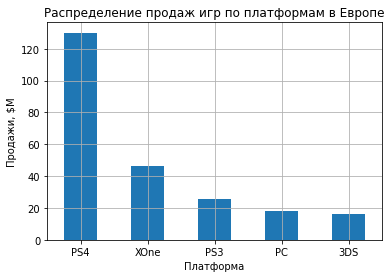

In [85]:
sales_by_region.sort_values(by='eu_sales', ascending=False)['eu_sales'].head().plot(kind='bar', rot=0, grid=True, figsize=(6,4))
plt.xlabel('Платформа')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по платформам в Европе')
plt.show()

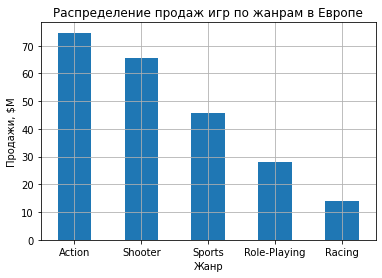

In [86]:
sales_by_genres.sort_values(by='eu_sales', ascending=False)['eu_sales'].head().plot(kind='bar', rot=0, grid=True,figsize=(6,4))
plt.xlabel('Жанр')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по жанрам в Европе')
plt.show()

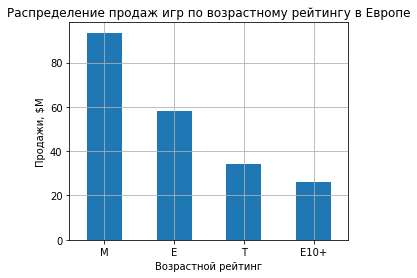

In [87]:
sales_by_rating.sort_values(by='eu_sales', ascending=False)['eu_sales'].plot(kind='bar', rot=0, grid=True, figsize=(5,4))
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по возрастному рейтингу в Европе')
plt.show()

В Европе наиболее популярная платформа PS4, оставшиеся же  XOne, X360, 3DS, PS3 идут с большим отрывом от лидера. Популярные жанры - шутеры, экшн, спорт. Самые продаваемые игры имеют возрастной рейтинг "M", следующие по популярности - "E".

- Рассмотрим поведение пользователей в Японии

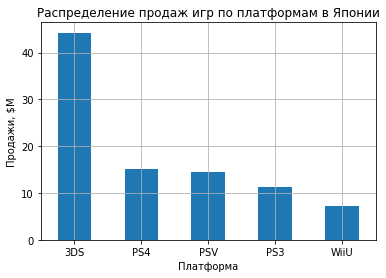

In [88]:
sales_by_region.sort_values(by='jp_sales', ascending=False)['jp_sales'].head().plot(kind='bar', rot=0, grid=True, figsize=(6,4))
plt.xlabel('Платформа')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по платформам в Японии')
plt.show()

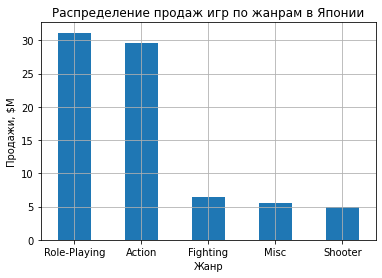

In [89]:
sales_by_genres.sort_values(by='jp_sales', ascending=False)['jp_sales'].head().plot(kind='bar', rot=0, grid=True,figsize=(6,4))
plt.xlabel('Жанр')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по жанрам в Японии')
plt.show()

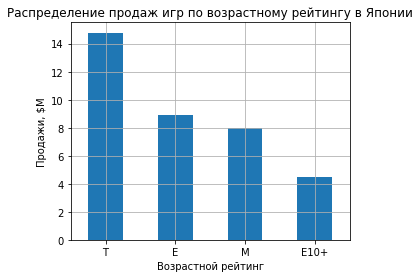

In [90]:
sales_by_rating.sort_values(by='jp_sales', ascending=False)['jp_sales'].plot(kind='bar', rot=0, grid=True, figsize=(5,4))
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Продажи, $M')
plt.title('Распределение продаж игр по возрастному рейтингу в Японии')
plt.show()

В продажах в Японии наиболее популярная платформа 3DS, следующая же за ним PS4 имеет в 3 раза меньшие продажи. Оставшиеся места заняли платформы PS3, PSV, WiiU. Наиболее популярные жанры RPG, Action, которые идут в большом отрыве от fighing, shooter, и других ("Misc"). Самые популярные игры по возрасту для подростков ("T") и всех возрастов ("E"). Типичный Японский пользователь - человек в подрастковом возрасте и выше, обладатель 3DS, играющий в RPG/Action.

### Вывод

На данном этапе были рассмотрены предпочтения пользователей из различных представленных регионов. Наиболее схожими между собой по предпочтению платформ и жанров являются пользователи из Северной Америки, Европы, а также других регионов: их объединяет использование PS4/XOne, играют они в динамичные жанры (action, shooter, sports, RPG), а наибольшая доля продаж приходится на игры с рейтингом "M" (17+). Пользователи из Японии же предпочитают игровые консоли 3DS, PSV, игры в RPG, action, fighting, а наибольшая возрастная категория в продажах "T" (13+), в отличие от остальных регионов.

## 6. Проверка гипотез <a id="step_6"></a>

- Провека гипотезы о равенстве пользовательских рейтингов платформ Xbox One и PC

Создадим таблицы с рейтингом пользователей двух платформ и изучим статистику распределения:

In [91]:
XOne_user_score = actual_data[(actual_data['platform'] == 'XOne') ]['user_score'].dropna()

In [92]:
PC_user_score = actual_data[(actual_data['platform'] == 'PC') ]['user_score'].dropna()

In [93]:
XOne_user_score.describe()

count   165.000
mean      6.595
std       1.375
min       1.600
25%       5.800
50%       6.800
75%       7.600
max       9.200
Name: user_score, dtype: float64

In [94]:
np.var(XOne_user_score)

1.8795460055096425

In [95]:
PC_user_score.describe()

count   122.000
mean      6.298
std       1.703
min       1.400
25%       5.325
50%       6.800
75%       7.600
max       9.300
Name: user_score, dtype: float64

In [96]:
np.var(PC_user_score)

2.8773743617307175

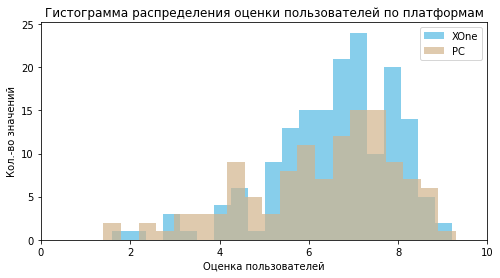

In [97]:
ax = XOne_user_score.plot(
        kind='hist', figsize=(8,4), bins=20, alpha=1, label='XOne', color='skyblue')
PC_user_score.plot(
    kind='hist', bins=20, ax=ax, alpha=0.7, label='PC', color='tan')
plt.xlim(0, 10)
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол.-во значений')
plt.title('Гистограмма распределения оценки пользователей по платформам')
ax.legend()
plt.show()

Далее определим значение параметра equal_var функции ttest_ind(). Для этого проверим распределения оценок пользователей XOne и PC на нормальность и в засисимости от этого выберем необходимый критерий проверки равенства дисперсий.

Проверяем гипотезу о нормальности двух выборок - средних оценках пользователей XOne и PC - с помощью критерия нормальности Шапиро-Уилка.  
Проверяем нормальность для XOne:   
H0 - нулевая гипотеза, средняя оценка пользователей распределена нормально;  
H1 - альтернативная гипотеза, средняя оценка пользователей не распределена нормально.  
Уровень значимости задаем 5%.

In [98]:
alpha = 0.05
stat, p_value = st.shapiro(XOne_user_score)

display('p-value критерия Шапиро-Уилка для пользователей XBox One равно ' + str(p_value))
if p_value < alpha:
    display('Нулевая гипотеза отвергается')
else:
    display('Нулевая гипотеза не отвергается')

'p-value критерия Шапиро-Уилка для пользователей XBox One равно 2.564911119407043e-05'

'Нулевая гипотеза отвергается'

Проверяем нормальность для распределения средней оценки пользователей PC:   
H0 - нулевая гипотеза, средняя оценка пользователей распределена нормально;  
H1 - альтернативная гипотеза, средняя оценка пользователей не распределена нормально.  
Уровень значимости примем 5%.

In [99]:
alpha = 0.05
stat, p_value = st.shapiro(PC_user_score)

display('p-value критерия Шапиро-Уилка для  для пользователей PC равен ' + str(p_value))
if p_value < alpha:
    display('Нулевая гипотеза отвергается')
else:
    display('Нулевая гипотеза не отвергается')

'p-value критерия Шапиро-Уилка для  для пользователей PC равен 0.0001799216988729313'

'Нулевая гипотеза отвергается'

Для обеих выборок мы отвергли гипотезы о нормальности распределения средних оценок.  
Далее проверяем гипотезу о равенстве дисперсий тестом Левена, т.к. он более надежен для данного случая.

Примем нулевую и альтернативную гипотезы:  
H0 - нулевая гипотеза, дисперсия оценок пользователей одинакова;  
H1 - альтернативная гипотеза, дисперсия оценок пользователей различается.  
Уровень значимости примем 5%.

In [100]:
alpha = 0.05
stat, p_value = st.levene(PC_user_score, XOne_user_score)

display('p-value теста Левена ' + str(p_value))
if p_value < alpha:
    display('Нулевая гипотеза отвергается')
else:
    display('Нулевая гипотеза не отвергается')

'p-value теста Левена 0.014868430917663678'

'Нулевая гипотеза отвергается'

Результат проверки тестом Левена будем использовать для определения параметра equal_var для t-теста о средних пользовательских рейтингах, в данном случае он будет равен "False".

Далее проверяем гипотезу о равенстве средних пользовательских рейтингов двух платформ.

Примем нулевую и альтернативную гипотезы:  
H0 - нулевая гипотеза, средние пользовательские рейтинги платформ одинаковые;  
H1 - альтернативная гипотеза, средние пользовательские рейтинги различаются.

Уровень статистической значимости примем 5%.
Для проверки гипотезы используем t-тест для двух выборок данных, т.к. данные (оценки пользователей) являются независимыми.

In [101]:
alpha = 0.05
score_test_platform = st.ttest_ind(XOne_user_score, PC_user_score, equal_var = False)
p_value = score_test_platform.pvalue

display('p-value равно ' + str(score_test_platform.pvalue))
if p_value < alpha:
    display('Нулевая гипотеза отвергается')
else:
    display('Нулевая гипотеза не отвергается')

'p-value равно 0.11601398086668827'

'Нулевая гипотеза не отвергается'

Результаты стастистического теста говорят о том, что с довольно большой вероятности значимое различие в средних оценках пользователей для платформ Xbox One и PC может быть получено случайно. Поэтому гипотезу о равенстве средних не отвергаем. В пользу этого также говорят близкие значения средних оценок пользователей и схожий характер распределения.

- Проверка гипотезы о разных средних пользовательских рейтингах жанров Action и Sports

Создадим таблицы с рейтингом пользователей двух жанров и изучим статистику распределения:

In [102]:
action_user_score = actual_data[(actual_data['genre'] == 'Action')]['user_score'].dropna()

In [103]:
sports_user_score = actual_data[(actual_data['genre'] == 'Sports')]['user_score'].dropna()

In [104]:
action_user_score.describe()

count   297.000
mean      6.761
std       1.378
min       2.000
25%       6.100
50%       7.100
75%       7.700
max       9.000
Name: user_score, dtype: float64

In [105]:
np.var(action_user_score)

1.89208448117539

In [106]:
sports_user_score.describe()

count   127.000
mean      5.225
std       1.857
min       0.200
25%       4.000
50%       5.500
75%       6.650
max       8.800
Name: user_score, dtype: float64

In [107]:
np.var(sports_user_score)

3.4198375596751185

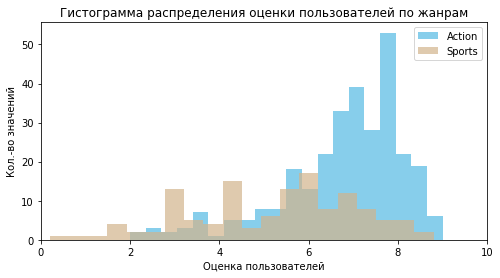

In [108]:
ax = action_user_score.plot(
        kind='hist', figsize=(8,4), bins=20, alpha=1, label='Action', color='skyblue')
sports_user_score.plot(
    kind='hist', bins=20, ax=ax, alpha=0.7, label='Sports', color='tan')
plt.xlim(0, 10)
plt.xlabel('Оценка пользователей')
plt.ylabel('Кол.-во значений')
plt.title('Гистограмма распределения оценки пользователей по жанрам')
ax.legend()
plt.show()

Аналогично далее определим значение параметра equal_var функции ttest_ind() для проверки гипотезы.   
Проверим распределения оценок пользователей по жанрам Action и Sports на нормальность, и в засисимости от этого выберем необходимый критерий проверки равенства дисперсий.

Проверяем гипотезу о нормальности двух выборок - оценок пользователей в жанрах Action и Sports - с помощью критерия нормальности Шапиро-Уилка.  
Проверяем нормальность для Action:   
H0 - нулевая гипотеза, средняя оценка пользователей распределена нормально;  
H1 - альтернативная гипотеза, средняя оценка пользователей не распределена нормально.  
Уровень значимости задаем 5%.

In [109]:
alpha = 0.05
stat, p_value = st.shapiro(action_user_score)

display('p-value критерия Шапиро-Уилка для оценок жанра Action ' + str(p_value))
if p_value < alpha:
    display('Нулевая гипотеза отвергается')
else:
    display('Нулевая гипотеза не отвергается')

'p-value критерия Шапиро-Уилка для оценок жанра Action 1.3703333173048504e-12'

'Нулевая гипотеза отвергается'

Проверяем нормальность для распределения оценок жанра Sports:   
H0 - средняя оценка пользователей распределена нормально;  
H1 - средняя оценка пользователей не распределена нормально.  
Уровень значимости примем 5%.

In [110]:
alpha = 0.05
stat, p_value = st.shapiro(sports_user_score)

display('p-value критерия Шапиро-Уилка для оценок жанра Action ' + str(p_value))
if p_value < alpha:
    display('Нулевая гипотеза отвергается')
else:
    display('Нулевая гипотеза не отвергается')

'p-value критерия Шапиро-Уилка для оценок жанра Action 0.03466314077377319'

'Нулевая гипотеза отвергается'

Для обеих выборок мы отвергли гипотезы о нормальности распределения средних оценок пользователей.  
Далее проверяем гипотезу о равенстве дисперсий тестом Левена, т.к. он более надежен для данного случая.

Примем нулевую и альтернативную гипотезы:  
H0 - нулевая гипотеза, дисперсия оценок пользователей одинакова;  
H1 - альтернативная гипотеза, дисперсия оценок пользователей различается.  
Уровень значимости примем 5%.

In [111]:
alpha = 0.05
stat, p_value = st.levene(action_user_score, sports_user_score)

display('p-value теста Левена ' + str(p_value))
if p_value < alpha:
    display('Нулевая гипотеза отвергается')
else:
    display('Нулевая гипотеза не отвергается')

'p-value теста Левена 4.480161685830322e-06'

'Нулевая гипотеза отвергается'

Результат проверки тестом Левена будем использовать для определения параметра equal_var для t-теста о средних пользовательских рейтингах, в данном случае он будет равен "False".

Далее проверяем гипотезу о равенстве среднего рейтинга пользователей в жанрах Action и Sports.

Примем нулевую и альтернативную гипотезы:

H0 - нулевая гипотеза, средние пользовательские рейтинги жанров Action и Sports одинаковые;

H1 - альтернативная гипотеза, средние пользовательские рейтинги жанров Action и Sports различаются.

Уровень статистической значимости alpha 5%.
Для проверки гипотезы используем t-тест для двух независимых выборок данных:

In [112]:
alpha = 0.05
score_test_genres = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)
p_value = score_test_genres.pvalue

display('p-value равно ' + str(score_test_genres.pvalue))
if p_value < alpha:
    display('Нулевая гипотеза отвергается')
else:
    display('Нулевая гипотеза не отвергается')

'p-value равно 1.1825550382644557e-14'

'Нулевая гипотеза отвергается'

Результаты стастистического теста говорят о том, что с очень малой вероятностью различия в средних оценках пользователей для платформ жанров Action и Sports могут быть получены случайно, различие статистически значимо. Поэтому гипотезу о равенстве средних не отвергаем.

### Вывод

На данном этапе были проверены гипотезы о равенстве пользовательских рейтингов платформ Xbox One и PC, а также о равенстве средних пользовательских рейтингах жанров Action и Sports. В результате первая гипотеза по результатам статистического теста для независимых выборок не отвергается, т.к. разница средних не является статистически значимой, и высока вероятность получения различных значений в результате случайности. Гипотеза о равенстве средних рейтингов жанров Action и Sports в результате стат. теста отвергается, т.к.  значение p-value является близким к нулю, и отличие статистически значимо. Данные выводы подтверждаются статистиками и диаграммами распределения соответствующих величин.

## 7. Общий вывод <a id="step_7"></a>

В данном исследовании было выполнено изучение и анализ данных по различным видеоиграм.

Входными данными является файл с 16715 записями за период 1980...2016 г., который содержит информацию о 31 игровой платформе, 12 различных жанрах, продажах игр по регионам, а также об их оценках и рейтинге. Было изучено содержимое данного файла и проведена предобработка данных, в результате которой был изменен формат нескольких столбцов для возможности дальнейшей работы с данными. Большая часть пропущенных значений была оставлена как есть для минимизации влияния на данные.

В результате анализа данных были выявлены следующие закономерности. Жизненный цикл игровой платформы на рынке составляет 7...10 лет. Годы с 2013 по 2016 это период относительной стабилизации кол.-ва выпущенных игр и продаж после значительного падения 2009 г.: продажи в период 2009...2012 уменьшились на 85%, 2012...2015 г. "всего" на 35%. Большая часть прежде распространенных платформ PS3, X360, Wii, DS на рубеже 2013-2014 г. стремительно теряет свою популярность, и они уже не являются перспективными для активных продаж. Набирают же популярность последние версии консолей PS4 , XBox One c общими продажами 288M USD (40%) и 140M USD (19%) за актуальный период. Они, вероятно, станут самыми продаваемыми и в 2017 г. Кроме того, их общие продажи  за актуальный период в 1.4 раза выше, чем сумма всех остальных платформ. Также об их популярности говорят самые большие значения средних продаж по отдельным играм среди всех актуальных платформ (PS4 в среднем 755k USD на игру, XOne 615k USD на игру), а также наибольшее кол.-во отдельных игр, приносящих сверхбольшие продажи. Большое число игр для PS4 (376), XOne (295) также будет способствовать их хорошим продажам. По-прежнему неплохие продажи показывает платформа 3DS (86M USD, 13% продаж), на которой было выпущено 212 игр за актуальный период. Но его продажи будут уменьшаться почти линейно со скоростью примерно 30% в год. PS3 (10% суммарных продаж), X360 (7% продаж) по-прежнему занимают большую долю рынка, но эти платформы будут продолжать стремительно падать. Относительно невысокую, но стабильную долю продаж  могут обеспечить игры для PC,  PSV - 4% и 3% суммарных продаж соответственно. 

Наиболее продаваемые жанры игр это action, shooter, sports, RPG. Являясь самыми активными и динамичными, они больше всего нравятся пользователям. Хуже всего продаются симуляторы, стратегии и пазлы. Ориентироваться при выборе конкретных игр на оценку критиков и пользователей нужно с осторожностью - они не являются гарантией хороших продаж, т.к. корреляция между ними слабая, либо совсем отсутствует. Портрет типичного пользователя для Северной Америки, Европы и других стран в целом похож - их объединяет предпочтение PS4, XOne, динамичные жанры action, shooter, sports, RPG, а также возрастной рейтинг 17+. Для Японии более характерен пользователь DS, PSV, играющий в RPG, action или fighting, а наибольшую возрастную категорию в продажах составляет рейтинг 13+.

В исследовании была проверена гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC. На основании результатов статистического теста она не была отвергнута - статистически значимая разница отсутствует. Также была проверена гипотеза о равенстве средних пользовательских рейтингах жанров Action и Sports. Данная гипотеза была отвергнута, т.к. в результате статистического теста был получен результат, который доказывает наличие значимого различия средних рейтингов.

Для увеличения выручки интернет-магазина необходимо сосредоточиться на рынках Северной Америки и Европы (в сумме это 76% рынка), в меньшей степени Японии (13% рынка). Для североамериканских пользователей необходимо максимизировать предложение для платформ PS4, XOne, 3DS и играх в жанрах action, shooter, sports, RPG. Для Европы нужно работать над предложением игр для платформ PS4, XOne, 3DS, PC и аналогичных Сев.Америке жанров. Пользователям Японии нужно предлагать игры на платформах 3DS, PS4, PSV и игры жанров RPG, action, fighing, shooter. Не следует тратить время на старые платформы, такие как PS3, XBox 360 - они уже не актуальны, и их продажи быстро падают. Расширять ассортимент интернет-магазина для всех пользователей лучше в области игр жанров Fighing, Racing, Platforms. При выборе предложения тех или иных игр желательно читать как можно больше профессиональных рецензий, оценки же пользователей серьезно воспринимать не стоит. Наиболее популярные активные игры могут быть высокого возрастного рейтинга, что будет нормальным для пользователей большей части мира. Но для пользователей Японии необходимо подготовить больше подростковых предложений.